Importacion de Librerias a Utilizar

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

Se utiliza un Dataframe previo a la reduccion que se realizo a su posterior uso en cargas web(github), para obtener mayores resultados

In [2]:
df_merged=pd.read_csv(r"C:\Users\Usuario\Desktop\ProyectoIndividual\DataSets-Clean\Df_Merged.csv", encoding="utf-8")
df_merged

,item_id,item_name,developer,user_id,playtime_forever,recommend,sentiment_score,posted_year,Action,Casual,...,Animation &amp; Modeling,Video Production,Utilities,Web Publishing,Education,Software Training,Design &amp; Illustration,Audio Production,Photo Editing,Accounting
0,282010,Carmageddon Max Pack,Stainless Games Ltd,UTNerd24,5,True,2,2014,1,0,...,0,0,0,0,0,0,0,0,0,0
1,282010,Carmageddon Max Pack,Stainless Games Ltd,UTNerd24,5,True,2,2015,1,0,...,0,0,0,0,0,0,0,0,0,0
2,282010,Carmageddon Max Pack,Stainless Games Ltd,UTNerd24,5,True,2,2015,1,0,...,0,0,0,0,0,0,0,0,0,0
3,282010,Carmageddon Max Pack,Stainless Games Ltd,UTNerd24,5,True,2,2015,1,0,...,0,0,0,0,0,0,0,0,0,0
4,282010,Carmageddon Max Pack,Stainless Games Ltd,UTNerd24,5,True,2,2014,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224071,80,Counter-Strike: Condition Zero,Valve,76561198082737449,6,True,2,2014,1,0,...,0,0,0,0,0,0,0,0,0,0
1224072,80,Counter-Strike: Condition Zero,Valve,toinhoto,17,True,2,2014,1,0,...,0,0,0,0,0,0,0,0,0,0
1224073,80,Counter-Strike: Condition Zero,Valve,toinhoto,17,True,2,2014,1,0,...,0,0,0,0,0,0,0,0,0,0
1224074,80,Counter-Strike: Condition Zero,Valve,toinhoto,17,True,2,2014,1,0,...,0,0,0,0,0,0,0,0,0,0


Descripcion Primera del Dataframe

In [3]:
df_merged.shape

(1224076, 30)

In [5]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224076 entries, 0 to 1224075
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   item_id                    1224076 non-null  int64 
 1   item_name                  1224076 non-null  object
 2   developer                  1203983 non-null  object
 3   user_id                    1224076 non-null  object
 4   playtime_forever           1224076 non-null  int64 
 5   recommend                  1224076 non-null  bool  
 6   sentiment_score            1224076 non-null  int64 
 7   posted_year                1224076 non-null  int64 
 8   Action                     1224076 non-null  int64 
 9   Casual                     1224076 non-null  int64 
 10  Indie                      1224076 non-null  int64 
 11  Simulation                 1224076 non-null  int64 
 12  Strategy                   1224076 non-null  int64 
 13  Free to Play               

Verificacion de Valores Nulos y reemplazo por No Data

In [46]:
valores_nulos_por_columna = df_merged.isnull().sum()
print(valores_nulos_por_columna)

item_id                          0
item_name                        0
developer                    20093
user_id                          0
playtime_forever                 0
recommend                        0
sentiment_score                  0
posted_year                      0
Action                           0
Casual                           0
Indie                            0
Simulation                       0
Strategy                         0
Free to Play                     0
RPG                              0
Sports                           0
Adventure                        0
Racing                           0
Early Access                     0
Massively Multiplayer            0
Animation &amp; Modeling         0
Video Production                 0
Utilities                        0
Web Publishing                   0
Education                        0
Software Training                0
Design &amp; Illustration        0
Audio Production                 0
Photo Editing       

In [47]:
df_merged['developer'].fillna("N/D", inplace=True)

Se trabaja sobre dataframe nuevo con la columna "playtime_forever", para la busqueda de posibles Outliers

In [26]:
df_merged_aux=pd.DataFrame(df_merged["playtime_forever"])
df_merged_aux.min()

playtime_forever    1
dtype: int64

In [27]:
df_merged_aux.max()

playtime_forever    100
dtype: int64

In [18]:
q1,q3=np.percentile(df_merged_aux["playtime_forever"],[25,75])

In [19]:
iqr=q3-q1

In [20]:
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

In [32]:
df_merged_aux['Zscore_playtime_forever'] = stats.zscore(df_merged_aux['playtime_forever'])
df_merged_aux[(df_merged_aux['Zscore_playtime_forever'] < -3) | (df_merged_aux['Zscore_playtime_forever'] > 3)]

,playtime_forever,Zscore_playtime_forever


Al utilizar una plantilla de Outliers, se observa que no se encuentran en el Dataframe, si los hubiera, corresponderia el siguiente codigo

In [ ]:
df_merged_aux[(df_merged_aux['Zscore_playtime_forever'] > -3) & (df_merged_aux['Zscore_playtime_forever'] < 3)]

Se procede a Graficar para una mejor descripcion del analisis de Outliers

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


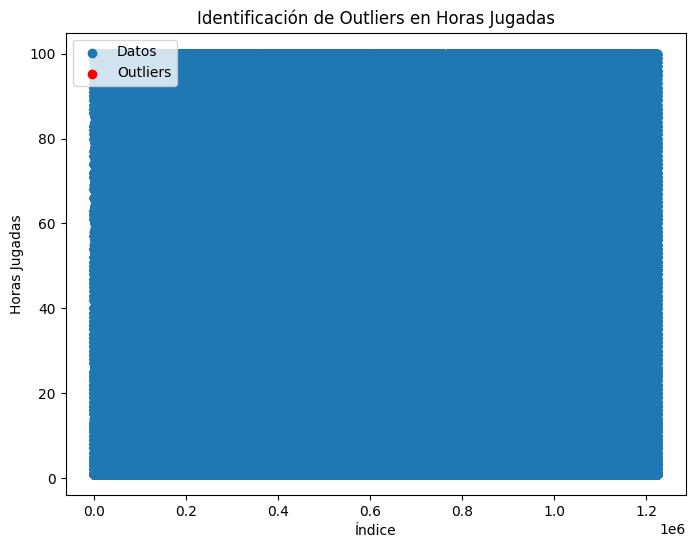

In [34]:
outliers = df_merged_aux[(df_merged_aux['Zscore_playtime_forever'] < -3) | (df_merged_aux['Zscore_playtime_forever'] > 3)]
# Se grafican los datos de 'playtime_forever'
plt.figure(figsize=(8, 6))
plt.scatter(df_merged_aux.index, df_merged_aux['playtime_forever'], label='Datos')
plt.scatter(outliers.index, outliers['playtime_forever'], color='red', label='Outliers')
plt.title('Identificación de Outliers en Horas Jugadas')
plt.xlabel('Índice')
plt.ylabel('Horas Jugadas')
plt.legend()
plt.show()

Se utiliza un segundo grafico de caja, para terminar la verificacion

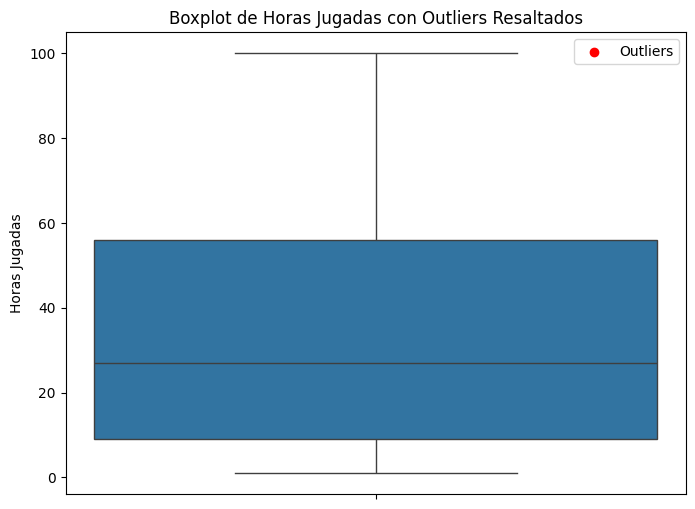

In [35]:
# Se crea el gráfico de caja
plt.figure(figsize=(8, 6))
sns.boxplot(y='playtime_forever', data=df_merged_aux, whis=3)  
plt.scatter(outliers.index, outliers['playtime_forever'], color='red', label='Outliers')
plt.title('Boxplot de Horas Jugadas con Outliers Resaltados')
plt.ylabel('Horas Jugadas')
plt.legend()
plt.show()

Se trabaja sobre la columna "posted_year" para verificar la correlacion de los años

In [36]:
df_merged_aux2=pd.DataFrame(df_merged["posted_year"])
df_merged_aux2

,posted_year
0,2014
1,2015
2,2015
3,2015
4,2014
...,...
1224071,2014
1224072,2014
1224073,2014
1224074,2014


Se procede a graficar agrupando por frecuencia de jugadores 

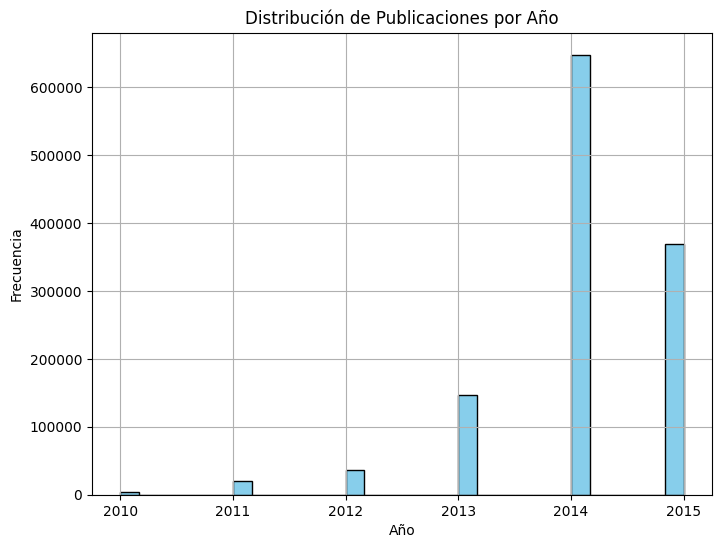

In [38]:
plt.figure(figsize=(8, 6))
plt.hist(df_merged_aux2['posted_year'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Publicaciones por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [39]:
df_merged_aux2.min()

posted_year    2010
dtype: int64

In [40]:
df_merged_aux2.max()

posted_year    2015
dtype: int64

Se trabaja sobre las columnas de "dummies" para graficar los generos mas jugados

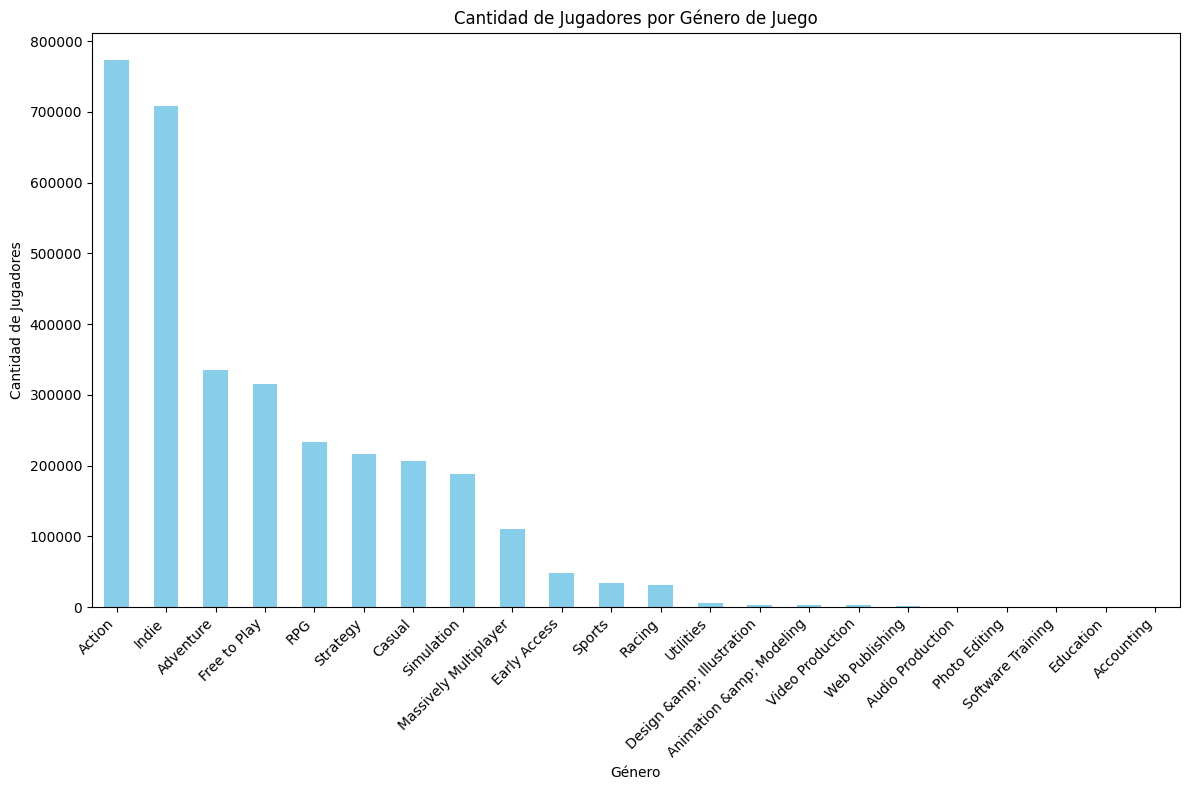

In [45]:
# Se Calcula la suma de jugadores por género, y se guarda en una Series
genre_counts = df_merged[['Action', 'Casual', 'Indie', 'Simulation', 'Strategy', 'Free to Play', 
                              'RPG', 'Sports', 'Adventure', 'Racing', 'Early Access', 
                              'Massively Multiplayer', 'Animation &amp; Modeling', 'Video Production', 
                              'Utilities', 'Web Publishing', 'Education', 'Software Training', 
                              'Design &amp; Illustration', 'Audio Production', 'Photo Editing', 
                              'Accounting']].sum()

# Se Ordena los géneros de mayor a menor
genre_counts = genre_counts.sort_values(ascending=False)

# Se grafican los géneros más jugados
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Jugadores por Género de Juego')
plt.xlabel('Género')
plt.ylabel('Cantidad de Jugadores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()